In [644]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [645]:
df=pd.read_csv('/content/diabetes (2).csv')

In [646]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [648]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [649]:
df.duplicated().sum()

np.int64(0)

In [650]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

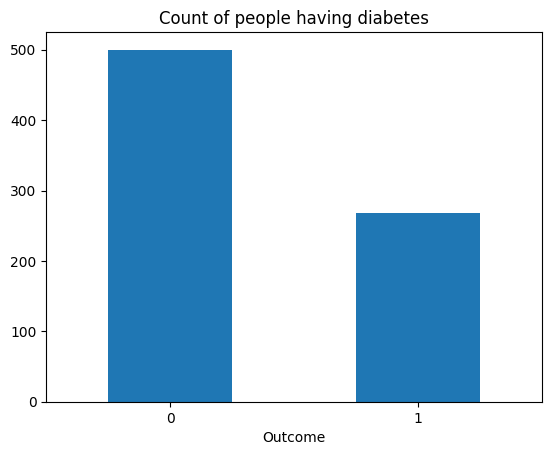

In [651]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel = 'Outcome'
plt.ylabel = 'Frequency'
plt.xticks(rotation=0)
plt.title('Count of people having diabetes');

In [652]:
tensor=torch.tensor(df.values,dtype=torch.float)

In [653]:
X =df.drop(columns='Outcome',axis=1).values
y =df['Outcome'].values

In [654]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [655]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [656]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(torch.tensor(X_scaled,dtype=torch.float32),y, test_size = 0.2,random_state=69)

In [657]:
from torch import nn
class DiabPred(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(in_features=8,out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16,out_features=1))
  def forward(self,x):
    return self.layers(x)

model=DiabPred()

In [658]:
model

DiabPred(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [659]:
lossf=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [660]:
from sklearn import metrics
torch.manual_seed(420)
epochs=2001

for epoch in range(epochs):
  model.train()

  y_logit=model(X_train)
  y_preds=torch.round(torch.sigmoid(y_logit))

  loss=lossf(y_logit.squeeze(),y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logit=model(X_test)
    test_preds=torch.round(torch.sigmoid(test_logit))

    test_loss=lossf(test_logit.squeeze(),y_test)

    acc=metrics.accuracy_score(y_train.numpy(),y_preds.numpy())
    test_acc=metrics.accuracy_score(y_test.numpy(),test_preds.numpy())

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.5f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.77040, Accuracy: 0.31922% | Test loss: 0.74828, Test acc: 0.33117%
Epoch: 100 | Loss: 0.49442, Accuracy: 0.75733% | Test loss: 0.48770, Test acc: 0.77273%
Epoch: 200 | Loss: 0.46101, Accuracy: 0.78339% | Test loss: 0.44679, Test acc: 0.79221%
Epoch: 300 | Loss: 0.44920, Accuracy: 0.77524% | Test loss: 0.43215, Test acc: 0.78571%
Epoch: 400 | Loss: 0.44247, Accuracy: 0.77524% | Test loss: 0.42775, Test acc: 0.78571%
Epoch: 500 | Loss: 0.43725, Accuracy: 0.78176% | Test loss: 0.42704, Test acc: 0.77922%
Epoch: 600 | Loss: 0.43333, Accuracy: 0.78013% | Test loss: 0.42613, Test acc: 0.79870%
Epoch: 700 | Loss: 0.43027, Accuracy: 0.78664% | Test loss: 0.42558, Test acc: 0.79870%
Epoch: 800 | Loss: 0.42732, Accuracy: 0.79153% | Test loss: 0.42590, Test acc: 0.81169%
Epoch: 900 | Loss: 0.42466, Accuracy: 0.78990% | Test loss: 0.42610, Test acc: 0.81818%
Epoch: 1000 | Loss: 0.42198, Accuracy: 0.78990% | Test loss: 0.42549, Test acc: 0.81169%
Epoch: 1100 | Loss: 0.41983, Accu

In [661]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_train.detach().numpy(), y_preds.detach().numpy()))


print("\nClassification Report (Precision, Recall, F1-Score):")
print(classification_report(y_train.detach().numpy(),y_preds.detach().numpy()))

print("Accuracy Score:")
print(accuracy_score(y_train.detach().numpy(), y_preds.detach().numpy()))


Confusion Matrix:
[[351  50]
 [ 63 150]]

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       401
         1.0       0.75      0.70      0.73       213

    accuracy                           0.82       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.82      0.81       614

Accuracy Score:
0.8159609120521173


In [662]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="predicting_diabetes_binary_classificatio.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)
print("Model saved")

Model saved
